## Outlier Detection

*Prepared by:*
**Jude Michael Teves**  

This is heavily based from https://machinelearningmastery.com/one-class-classification-algorithms/

## Preliminaries

### Import libraries

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style('darkgrid')

# sns.set_palette('Set2')
# sns.color_palette('Set2')

### Generate Dataset

In [99]:
# isolation forest for imbalanced classification
from sklearn.datasets import make_classification

# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.95], flip_y=0, random_state=42)

In [100]:
X.shape

(10000, 2)

In [101]:
pd.Series(y).value_counts()

0    9500
1     500
dtype: int64

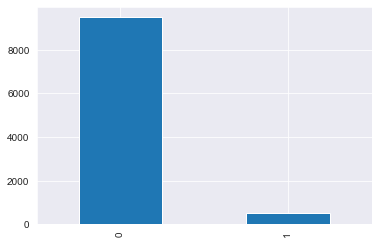

In [102]:
pd.Series(y).value_counts().plot(kind='bar')

### Train Isolation Forest

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest

# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

# define outlier detection model
model = IsolationForest(behaviour='new', random_state=42)

# fit on majority class
X_train = X_train[y_train==0]
model.fit(X_train)

C:\Anaconda\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


IsolationForest(behaviour='new', bootstrap=False, contamination='legacy',
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=42, verbose=0, warm_start=False)

In [111]:
pd.Series(y_test).value_counts()

0    4750
1     250
dtype: int64

### Predict Outliers

In [104]:
# detect outliers in the test set
y_hat = model.predict(X_test)

Inliers are 1, outliers are -1.

In [105]:
y_hat

array([1, 1, 1, ..., 1, 1, 1])

In [106]:
pd.Series(y_hat).value_counts()

 1    4270
-1     730
dtype: int64

In [107]:
print(f'Number of outliers: {sum(y_hat==-1)}')

Number of outliers: 730


### Preprocess Test Set

In [108]:
# mark inliers 1, outliers -1
y_test_new = y_test.copy()
y_test_new[y_test == 0] = 1
y_test_new[y_test == 1] = -1

### Evaluate

In [109]:
# calculate score
score = f1_score(y_test_new, yhat, pos_label=-1)
print('F1 Score: %.3f' % score)

F1 Score: 0.075


In [110]:
from sklearn.metrics import classification_report

print(classification_report(y_test_new, yhat))

              precision    recall  f1-score   support

          -1       0.06      0.11      0.07       250
           1       0.95      0.90      0.93      4750

    accuracy                           0.86      5000
   macro avg       0.50      0.51      0.50      5000
weighted avg       0.91      0.86      0.88      5000



## End
<sup>made by **Jude Michael Teves**</sup> <br>
<sup>for comments, corrections, suggestions, please email:</sup><sup> <href>judemichaelteves@gmail.com</href> or <href>jude.teves@dlsu.edu.ph</href></sup><br>